# Predicting Reliance Industries Stock Performance

## Reliance Industries Stock Information

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv(r"C:\Users\diyad\Downloads\reliance_data.csv")

# Display the first few rows of the dataframe
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,01-01-1996,RELIANCE,EQ,204.65,205.00,206.10,203.65,NaN,205.75,205.26,3717450,7.630000e+13,NaN,NaN,NaN
1,02-01-1996,RELIANCE,EQ,205.75,205.25,206.25,202.65,NaN,204.15,204.13,6024650,1.230000e+14,NaN,NaN,NaN
2,03-01-1996,RELIANCE,EQ,204.15,207.50,216.95,205.25,NaN,205.70,207.04,7473500,1.550000e+14,NaN,NaN,NaN
3,04-01-1996,RELIANCE,EQ,205.70,203.75,204.40,201.05,NaN,203.80,202.47,7744000,1.570000e+14,NaN,NaN,NaN
4,05-01-1996,RELIANCE,EQ,203.80,203.00,203.00,200.65,NaN,202.40,202.05,5952000,1.200000e+14,NaN,NaN,NaN


In [6]:
import datetime

# Cleaning
df.dropna(inplace=True)
df.drop(columns=['Symbol', 'Series'], inplace=True)
df.rename(columns={'%Deliverble' : '% Deliverable'}, inplace=True)
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y').dt.strftime('%m/%d/%Y')
df.head()

,Date,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,% Deliverable
3849,06/01/2011,951.85,952.00,958.65,943.65,947.5,946.80,947.83,1838452,1.740000e+14,58630.0,901415.0,0.4903
3850,06/02/2011,946.80,936.55,954.70,936.55,952.5,951.05,947.09,2152963,2.040000e+14,63061.0,1066759.0,0.4955
3851,06/03/2011,951.05,960.50,967.00,931.50,936.0,934.60,951.69,4368279,4.160000e+14,128784.0,1035791.0,0.2371
3852,06/06/2011,934.60,934.65,940.80,928.15,938.6,937.75,935.29,1405741,1.310000e+14,43384.0,476631.0,0.3391
3853,06/07/2011,937.75,933.55,960.00,933.55,959.6,958.25,950.55,4025919,3.830000e+14,88703.0,2424958.0,0.6023


In [7]:
df.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,% Deliverable
count,2356.000000,2356.000000,2356.000000,2356.000000,2356.00000,2356.000000,2356.000000,2.356000e+03,2.356000e+03,2.356000e+03,2.356000e+03,2356.000000
mean,1064.830603,1066.220437,1078.565832,1053.241235,1065.19045,1065.243739,1066.026685,6.186953e+06,7.697837e+14,1.383690e+05,2.755179e+06,0.501647
std,312.354807,313.924010,317.751763,309.084060,313.19919,312.856823,313.446675,6.205194e+06,1.102733e+15,1.260736e+05,2.062938e+06,0.122641
min,676.100000,675.000000,682.800000,673.050000,676.15000,676.100000,676.940000,1.110540e+05,9.040000e+12,2.991000e+03,2.909700e+04,0.114800
25%,857.687500,859.700000,869.737500,847.387500,858.00000,857.687500,858.575000,2.794905e+06,2.550000e+14,7.119900e+04,1.479892e+06,0.423500
50%,966.575000,965.950000,976.800000,957.500000,966.50000,966.775000,967.795000,4.177027e+06,3.870000e+14,9.841550e+04,2.186191e+06,0.513200
75%,1203.862500,1203.425000,1220.500000,1185.562500,1202.46250,1204.425000,1204.225000,7.101557e+06,8.035000e+14,1.559778e+05,3.312502e+06,0.589300
max,2324.550000,2325.000000,2369.350000,2310.550000,2324.90000,2324.550000,2339.460000,6.523089e+07,1.473430e+16,1.428490e+06,1.919505e+07,0.832700


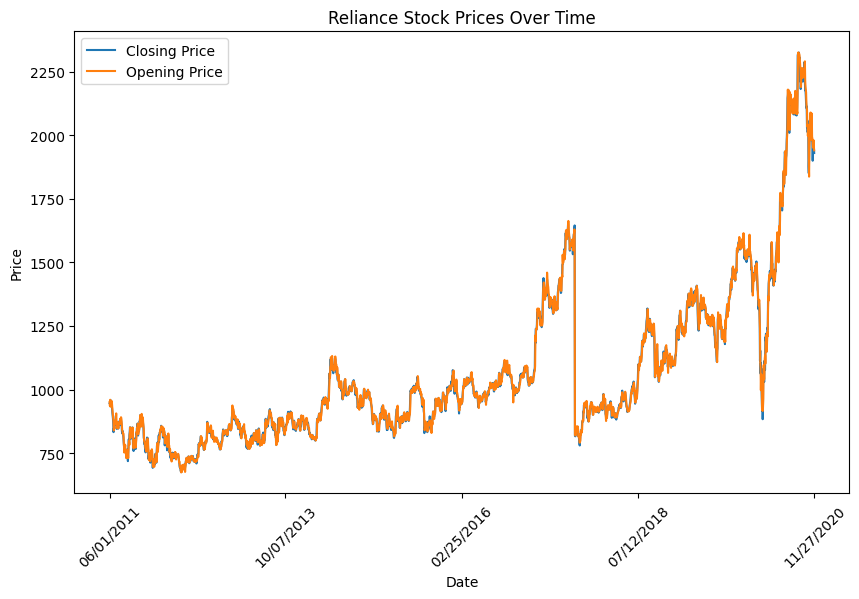

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Close'], label='Closing Price')
plt.plot(df['Date'], df['Open'], label='Opening Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Reliance Stock Prices Over Time')
plt.xticks([df.iloc[0, df.columns.get_loc('Date')], df.iloc[len(df) // 4, df.columns.get_loc('Date')], 
df.iloc[len(df) // 2, df.columns.get_loc('Date')], df.iloc[3 * len(df) // 4, df.columns.get_loc('Date')],
df.iloc[-1, df.columns.get_loc('Date')]], rotation=45)
plt.legend()
plt.show()

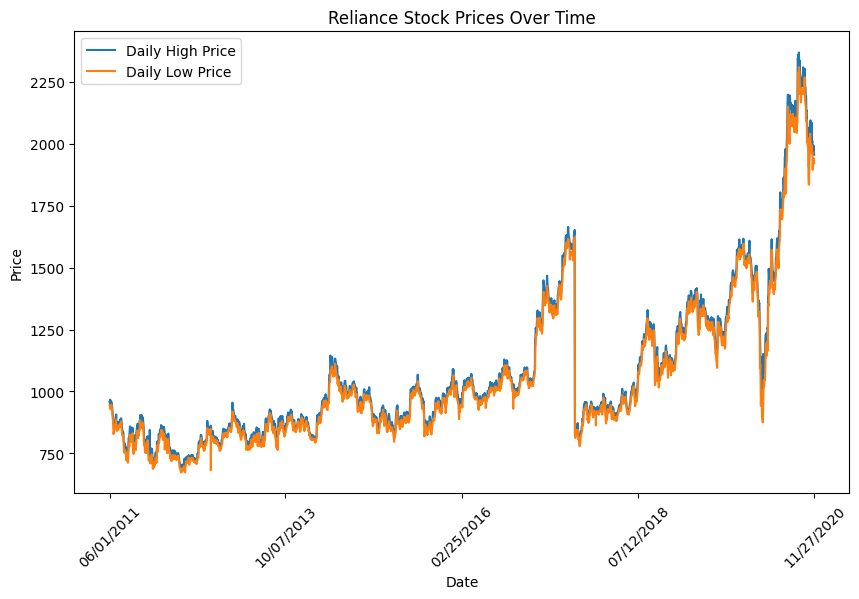

In [10]:
# Plotting the high/low stock prices over time
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['High'], label='Daily High Price')
plt.plot(df['Date'], df['Low'], label='Daily Low Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Reliance Stock Prices Over Time')
plt.legend()
plt.xticks([df.iloc[0, df.columns.get_loc('Date')], df.iloc[len(df) // 4, df.columns.get_loc('Date')], 
df.iloc[len(df) // 2, df.columns.get_loc('Date')], df.iloc[3 * len(df) // 4, df.columns.get_loc('Date')],
df.iloc[-1, df.columns.get_loc('Date')]], rotation=45)
plt.show()

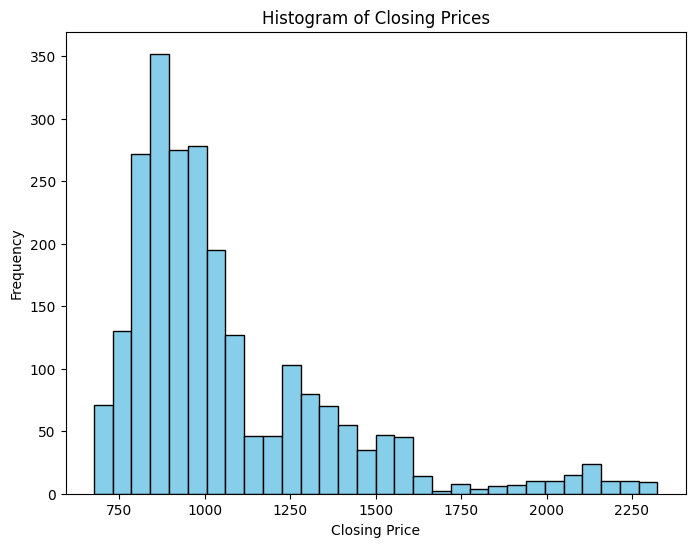

In [11]:
# Histogram of closing prices
plt.figure(figsize=(8, 6))
plt.hist(df['Close'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Closing Price')
plt.ylabel('Frequency')
plt.title('Histogram of Closing Prices')
plt.show()


In [12]:
# Calculate average closing price
average_price = df['Close'].mean()

print(f"Average Closing Price: {average_price}")


Average Closing Price: 1065.2437393887947


In [13]:
# drop prev_close column
df.drop('Prev Close', axis=1, inplace=True)

In [14]:
# Add columns for previous closing prices
num_prev_days = 3  # Number of previous days to consider
for i in range(1, num_prev_days + 1):
    df[f'Prev Close {i}'] = df['Close'].shift(i)

# Drop rows with NaN values resulting from the shift
df.dropna(inplace=True)

# Display the first few rows of the DataFrame with added columns
df.head()


,Date,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,% Deliverable,Prev Close 1,Prev Close 2,Prev Close 3
3852,06/06/2011,934.65,940.80,928.15,938.60,937.75,935.29,1405741,1.310000e+14,43384.0,476631.0,0.3391,934.60,951.05,946.80
3853,06/07/2011,933.55,960.00,933.55,959.60,958.25,950.55,4025919,3.830000e+14,88703.0,2424958.0,0.6023,937.75,934.60,951.05
3854,06/08/2011,955.25,955.95,943.95,951.35,949.20,948.28,3247038,3.080000e+14,68474.0,2083780.0,0.6417,958.25,937.75,934.60
3855,06/09/2011,947.50,957.85,947.00,954.60,954.00,953.65,2092020,2.000000e+14,53229.0,1117870.0,0.5343,949.20,958.25,937.75
3856,06/10/2011,955.10,956.00,932.05,946.00,944.50,942.51,2530136,2.380000e+14,89198.0,1358091.0,0.5368,954.00,949.20,958.25


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [16]:
# Split the data into training and testing sets
X = df[['Prev Close 1', 'Prev Close 2', 'Prev Close 3']]
y = df['Close']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"R2 Score: {r2}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


R2 Score: 0.9803875013907803
Root Mean Squared Error (RMSE): 42.84315255587521


c:\Users\diyad\miniconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


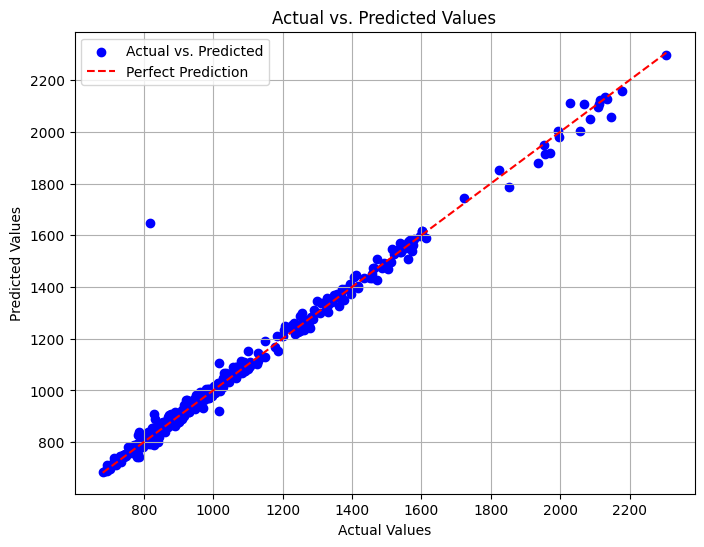

In [17]:
# Plotting actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs. Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

## Narendra Modi Tweets

In [18]:
# modi's tweets sentiment analysis
tweets = pd.read_csv(r"C:\Users\diyad\Downloads\PM_Modi_speeches.csv")
tweets

,date,title,url,lang,words,text
0,"Aug 30, 2020",PM’s address in the 15th Episode of ‘Mann Ki B...,https://www.pmindia.gov.in/en/news_updates/pms...,en,21619,"My dear countrymen, Namaskar.\nGenerally, this..."
1,"Aug 29, 2020",PM’s address at inauguration of the College an...,https://www.pmindia.gov.in/en/news_updates/pms...,en,10128,Our country’s Agriculture Minister Shri Narend...
2,"Aug 27, 2020",PM’s address at seminar on Atmanirbhar Bharat ...,https://www.pmindia.gov.in/en/news_updates/pms...,en,8497,"My cabinet colleague, Shri Rajnath ji, Chief o..."
3,"Aug 15, 2020",PM’s address to the Nation from the ramparts o...,https://www.pmindia.gov.in/en/news_updates/pms...,en,50260,"My dear countrymen,\nCongratulations and many ..."
4,"Aug 13, 2020",PM’s address at the Launch of ‘Transparent Tax...,https://www.pmindia.gov.in/en/news_updates/pms...,en,11908,The process of Structural Reforms going on in ...
...,...,...,...,...,...,...
917,"Oct 09, 2014",Text of the PM’s keynote address at the “Inves...,https://www.pmindia.gov.in/en/news_updates/tex...,hi,21430,"भाइयों और बहनों,\nये ऐसा कार्यक्रम है, जिसमें ..."
918,"Oct 03, 2014",English rendering of text of PM’s first Mann K...,https://www.pmindia.gov.in/en/news_updates/eng...,en,11169,"My Dear Countrymen,\nToday is the holy festiva..."
919,"Oct 03, 2014",Text of PM’s first Mann ki Baat to the Nation ...,https://www.pmindia.gov.in/en/news_updates/tex...,hi,10312,"मेरे प्यारे देशवासियो,\nआज विजयदशमी का पावन पर..."
920,"Oct 02, 2014",Text of PM’s address during launch of ‘Swachh ...,https://www.pmindia.gov.in/en/news_updates/tex...,hi,15605,भारत माता की जय!\nमहात्मा गांधी अमर रहे! महात्...


In [19]:
# Cleaning the data
tweets.dropna(inplace=True)
tweets = tweets[tweets['lang'] == 'en']
tweets.drop(columns=['url', 'lang', 'words'], inplace=True)
tweets.rename(columns={'date' : 'Date', 'title' : 'Title', 'text' : 'Text'}, inplace=True)
tweets['Date'] = pd.to_datetime(tweets['Date'])
tweets.sort_values(by=['Date'], ascending=True, inplace=True)
tweets

C:\Users\diyad\AppData\Local\Temp\ipykernel_16028\2184958366.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets.drop(columns=['url', 'lang', 'words'], inplace=True)
C:\Users\diyad\AppData\Local\Temp\ipykernel_16028\2184958366.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets.rename(columns={'date' : 'Date', 'title' : 'Title', 'text' : 'Text'}, inplace=True)
C:\Users\diyad\AppData\Local\Temp\ipykernel_16028\2184958366.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

,Date,Title,Text
921,2014-08-15,PM’s address to the Nation from the ramparts o...,Prime Minister Shri Narendra Modi addressed th...
918,2014-10-03,English rendering of text of PM’s first Mann K...,"My Dear Countrymen,\nToday is the holy festiva..."
915,2014-10-11,PM’s remarks at the launch of the book Virat P...,"Prime Minister, Shri Narendra Modi, today laun..."
907,2014-10-31,English rendering of text of PM’s address at “...,Following is the English rendering of Prime Mi...
906,2014-11-02,English rendering of text of Prime Minister’s ...,"My dear fellow countrymen, \nI am with you aga..."
...,...,...,...
4,2020-08-13,PM’s address at the Launch of ‘Transparent Tax...,The process of Structural Reforms going on in ...
3,2020-08-15,PM’s address to the Nation from the ramparts o...,"My dear countrymen,\nCongratulations and many ..."
2,2020-08-27,PM’s address at seminar on Atmanirbhar Bharat ...,"My cabinet colleague, Shri Rajnath ji, Chief o..."
1,2020-08-29,PM’s address at inauguration of the College an...,Our country’s Agriculture Minister Shri Narend...


In [20]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [21]:
# Download NLTK resources (Vader lexicon)
nltk.download('vader_lexicon')
# Initialize the VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\diyad\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [22]:
# Perform sentiment analysis and store results in a DataFrame
sentiments = []
modi_tweets = tweets['Text']

sentiments = []
for tweet in modi_tweets:
    scores = sia.polarity_scores(tweet)
    sentiments.append({
        'Text': tweet,
        'Positive': scores['pos'],
        'Negative': scores['neg'],
        'Neutral': scores['neu'],
        'Compound': scores['compound']
    })

# Create DataFrame from the sentiments list
sentiments_df = pd.DataFrame(sentiments)

merged_df = pd.merge(tweets, sentiments_df, on='Text', how='inner')

# Print sentiment analysis results
merged_df

,Date,Title,Text,Positive,Negative,Neutral,Compound
0,2014-08-15,PM’s address to the Nation from the ramparts o...,Prime Minister Shri Narendra Modi addressed th...,0.137,0.062,0.801,1.0000
1,2014-10-03,English rendering of text of PM’s first Mann K...,"My Dear Countrymen,\nToday is the holy festiva...",0.177,0.032,0.790,0.9999
2,2014-10-11,PM’s remarks at the launch of the book Virat P...,"Prime Minister, Shri Narendra Modi, today laun...",0.111,0.006,0.883,0.9387
3,2014-10-31,English rendering of text of PM’s address at “...,Following is the English rendering of Prime Mi...,0.160,0.057,0.782,0.9988
4,2014-11-02,English rendering of text of Prime Minister’s ...,"My dear fellow countrymen, \nI am with you aga...",0.181,0.046,0.773,0.9999
...,...,...,...,...,...,...,...
486,2020-08-13,PM’s address at the Launch of ‘Transparent Tax...,The process of Structural Reforms going on in ...,0.170,0.031,0.799,0.9998
487,2020-08-15,PM’s address to the Nation from the ramparts o...,"My dear countrymen,\nCongratulations and many ...",0.173,0.036,0.791,1.0000
488,2020-08-27,PM’s address at seminar on Atmanirbhar Bharat ...,"My cabinet colleague, Shri Rajnath ji, Chief o...",0.184,0.029,0.788,0.9997
489,2020-08-29,PM’s address at inauguration of the College an...,Our country’s Agriculture Minister Shri Narend...,0.172,0.037,0.791,0.9997


In [23]:
# Combine sentiment analysis with stock prices
merged_df['Date'] = pd.to_datetime(merged_df['Date'])
df['Date'] = pd.to_datetime(df['Date'])

# Perform an inner merge based on the 'Date' column to filter the stock price DataFrame
tweets_stocks = pd.merge(merged_df, df, on='Date', how='inner')

tweets_stocks.drop(columns=['Open', 'Last', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume', '% Deliverable',
'Prev Close 1', 'Prev Close 2', 'Prev Close 3'], inplace=True)

# Display the merged DataFrame with filtered stock prices
tweets_stocks.head()


,Date,Title,Text,Positive,Negative,Neutral,Compound,High,Low,Close
0,2014-10-31,English rendering of text of PM’s address at “...,Following is the English rendering of Prime Mi...,0.160,0.057,0.782,0.9988,1003.70,981.85,1000.55
1,2014-11-12,English rendering of the PM’s opening statemen...,I am very pleased to have the privilege to par...,0.272,0.016,0.712,0.9992,983.00,968.70,974.05
2,2014-11-12,"PM’s remarks at the 12th India-ASEAN Summit, N...","Your Excellency, President U Thein Sein, I am ...",0.176,0.015,0.809,0.9992,983.00,968.70,974.05
3,2014-11-13,English rendering of PM’s remarks at the East ...,"Your Excellency President Thein Sein, Excellen...",0.228,0.072,0.700,0.9979,979.80,963.40,969.25
4,2014-11-17,PM’s speech at the Business breakfast hosted b...,I would like to begin by acknowledging the tra...,0.237,0.007,0.756,0.9998,987.55,966.00,985.20


In [24]:
# Generate trading signals based on sentiment scores
trading_signals = []
for score in sentiments_df['Compound']:
    if score > 0:
        trading_signals.append("Buy")
    elif score < 0:
        trading_signals.append("Sell")
    else:
        trading_signals.append("Hold")

In [26]:
import numpy as np
unique_values, counts = np.unique(trading_signals, return_counts=True)
value_counts = dict(zip(unique_values, counts))
print(value_counts)

{'Buy': 486, 'Sell': 5}


In [27]:
tweets_stocks['Close'].corr(tweets_stocks['Compound'])


-0.04752469876371922

We know that the compound score from sentiment analysis tells us the degree of the sentiment, with -1 being the most extreme negative and +1 being the most extreme positive. So it is logical for investors to buy during times of positive sentiment and sell during times of negative sentiment. When applying sentiment analysis to Modi's tweets, we found that most of his tweets were positive, which would encourage investors to buy Reliance Industries stock. 

However, we must keep in mind that these tweets are not actually about Reliance Industries. When we look at the correlation between the compound score and the closing price for Reliance, we see that it is very slightly negative (close to 0). So this means that Modi's tweets may not have such a large impact on the stock price. 

## Financial News Articles

In [28]:
# indian financial news articles
fin_news = pd.read_csv(r"C:\Users\diyad\Downloads\IndianFinancialNews.csv")
cols = fin_news.columns
fin_news.drop(columns=cols[0], inplace=True)
fin_news['Date'] = pd.to_datetime(fin_news['Date'])
fin_news.sort_values(by=['Date'], ascending=True, inplace=True)
fin_news

,Date,Title,Description
49999,2003-02-10,Sticky Loans Divide Consortiums,Sticky Loans Divide Consortiums
49998,2003-02-10,Rbi Calls Meet To Push Floating Rate Deposits,Rbi Calls Meet To Push Floating Rate Deposits
49997,2003-02-10,"Net Scheduled Inflows Of Rs 1,559.9 Crore","Net Scheduled Inflows Of Rs 1,559.9 Crore"
49993,2003-02-11,Crisil Scripts Risk Gauge Tool For Film Industry,Crisil Scripts Risk Gauge Tool For Film Industry
49996,2003-02-11,Banks Plan To Raise Lending Rates Without Alte...,Banks Plan To Raise Lending Rates Without Alte...
...,...,...,...
4,2020-05-23,DCB Bank's profit before tax declines 37.6% to...,Net profit for the financial year ended March ...
3,2020-05-24,"Bank of Maharashtra sanctioned Rs 2,789 cr in ...",The bank said it was now gearing up to extend ...
2,2020-05-25,"Huge scam in YES Bank for many years, says Enf...",Rana Kapoor's wife also charged with abetting ...
1,2020-05-26,IDFC First Bank seniors to forgo 65% of bonus ...,"V Vaidyanathan, managing director and chief ex..."


In [29]:
# Perform sentiment analysis and store results in a DataFrame
fin_sentiments = []
fin_titles = fin_news['Title']

sentiments = []
for title in fin_titles:
    scores = sia.polarity_scores(title)
    sentiments.append({
        'Title': title,
        'Positive': scores['pos'],
        'Negative': scores['neg'],
        'Neutral': scores['neu'],
        'Compound': scores['compound']
    })

# Create DataFrame from the sentiments list
sentiments_df = pd.DataFrame(sentiments)

title_sentiments = pd.merge(fin_news, sentiments_df, on='Title', how='inner')

# Print sentiment analysis results
title_sentiments

,Date,Title,Description,Positive,Negative,Neutral,Compound
0,2003-02-10,Sticky Loans Divide Consortiums,Sticky Loans Divide Consortiums,0.000,0.000,1.000,0.0000
1,2003-02-10,Rbi Calls Meet To Push Floating Rate Deposits,Rbi Calls Meet To Push Floating Rate Deposits,0.000,0.000,1.000,0.0000
2,2003-02-10,"Net Scheduled Inflows Of Rs 1,559.9 Crore","Net Scheduled Inflows Of Rs 1,559.9 Crore",0.000,0.000,1.000,0.0000
3,2003-02-11,Crisil Scripts Risk Gauge Tool For Film Industry,Crisil Scripts Risk Gauge Tool For Film Industry,0.000,0.231,0.769,-0.2732
4,2003-02-11,Banks Plan To Raise Lending Rates Without Alte...,Banks Plan To Raise Lending Rates Without Alte...,0.000,0.000,1.000,0.0000
...,...,...,...,...,...,...,...
66015,2020-05-23,DCB Bank's profit before tax declines 37.6% to...,Net profit for the financial year ended March ...,0.195,0.000,0.805,0.4404
66016,2020-05-24,"Bank of Maharashtra sanctioned Rs 2,789 cr in ...",The bank said it was now gearing up to extend ...,0.000,0.000,1.000,0.0000
66017,2020-05-25,"Huge scam in YES Bank for many years, says Enf...",Rana Kapoor's wife also charged with abetting ...,0.329,0.212,0.459,0.2577
66018,2020-05-26,IDFC First Bank seniors to forgo 65% of bonus ...,"V Vaidyanathan, managing director and chief ex...",0.199,0.233,0.568,-0.1531


In [30]:
title_sentiments['Date'] = pd.to_datetime(fin_news['Date'])
df['Date'] = pd.to_datetime(df['Date'])

# Perform an inner merge based on the 'Date' column to filter the stock price DataFrame
news_stocks = pd.merge(title_sentiments, df, on='Date', how='inner')

news_stocks.drop(columns=['VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume', '% Deliverable'], inplace=True)

# Display the merged DataFrame with filtered stock prices
news_stocks.head()


,Date,Title,Description,Positive,Negative,Neutral,Compound,Open,High,Low,Last,Close,Prev Close 1,Prev Close 2,Prev Close 3
0,2020-05-26,Sticky Loans Divide Consortiums,Sticky Loans Divide Consortiums,0.0,0.0,1.0,0.0,1448.15,1449.7,1416.3,1426.0,1424.05,1431.55,1441.25,1433.7
1,2020-05-26,Rbi Calls Meet To Push Floating Rate Deposits,Rbi Calls Meet To Push Floating Rate Deposits,0.0,0.0,1.0,0.0,1448.15,1449.7,1416.3,1426.0,1424.05,1431.55,1441.25,1433.7
2,2020-05-22,Uti Bank Rolls Out At Par Facility,Uti Bank Rolls Out At Par Facility,0.0,0.0,1.0,0.0,1451.80,1458.0,1426.5,1433.0,1431.55,1441.25,1433.70,1408.9
3,2020-05-22,"Lic Swaps Rs 1,700 Crore Gilts With Sbi","Lic Swaps Rs 1,700 Crore Gilts With Sbi",0.0,0.0,1.0,0.0,1451.80,1458.0,1426.5,1433.0,1431.55,1441.25,1433.70,1408.9
4,2020-05-22,Uti Bank Eyes Pref Issue As Tata Plan Hits Roa...,Uti Bank Eyes Pref Issue As Tata Plan Hits Roa...,0.0,0.0,1.0,0.0,1451.80,1458.0,1426.5,1433.0,1431.55,1441.25,1433.70,1408.9


In [31]:
# Generate trading signals based on sentiment scores
trading_signals = []
for score in title_sentiments['Compound']:
    if score > 0:
        trading_signals.append("Buy")
    elif score < 0:
        trading_signals.append("Sell")
    else:
        trading_signals.append("Hold")

In [32]:
unique_values, counts = np.unique(trading_signals, return_counts=True)
value_counts = dict(zip(unique_values, counts))
print(value_counts)

{'Buy': 13482, 'Hold': 42903, 'Sell': 9635}


In [403]:
news_stocks['Close'].corr(news_stocks['Compound'])


-0.0528245423797038

Similar to Modi's tweets, there is very little correlation between the sentiments of financial news articles and the stock price on the day of the article. We see that the sentiments of the articles themselves are much more varied, with a range of positive articles (13482 buys), neutral articles (42903 hold), and negative articles (9635 sell). But in spite of this, the price of the stock itself only has a slight negative correlation with the compound score (nearly negligible). So we can say that there is not a strong correlation between the sentiments of financial news articles and Reliance's stock price.

## Indian Stock Market Sector Performance

In [33]:
# collect data from other sectors
sector_df = pd.read_excel(r"C:\Users\diyad\Downloads\sml_sector_dataset.xlsm", sheet_name="Sheet2")
sector_df

,Name,S&P BSE Healthcare - PRICE INDEX,S&P BSE AUTO - PRICE INDEX,S&P BSE BANKEX - PRICE INDEX,S&P BSE CAPITAL GOODS - PRICE INDEX,S&P BSE COMMODITIES - PRICE INDEX,S&P BSE CONS DISCR - PRICE INDEX,S&P BSE CONSUMER DURABLES - PRICE INDEX,S&P BSE Energy - PRICE INDEX,S&P BSE FIN SVS - PRICE INDEX,S&P BSE Fast Moving Consumer Goods - PRICE INDEX,S&P BSE Industrials - PRICE INDEX,S&P BSE Information Technology - PRICE INDEX,S&P BSE METAL - PRICE INDEX,S&P BSE OIL & GAS - PRICE INDEX,S&P BSE POWER - PRICE INDEX,S&P BSE REALTY - PRICE INDEX,S&P BSE TELECOM - PRICE INDEX,S&P BSE Utilities - PRICE INDEX
0,Code,BSEHECR,BSEAUTO,BSEBANK,BSECPGD,BSEBMAT,BSECDGS,BSECNDB,BSEENER,BSEFINC,BSEFMCS,BSEINDS,BSEINTC,BSEMETL,BSEO&GA,BSEPOWR,BSERELT,BSETELE,BSEUTIL
1,CURRENCY,IR,IR,IR,IR,IR,IR,IR,IR,IR,IR,IR,IR,IR,IR,IR,IR,IR,IR
2,1996-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1996-01-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1996-01-03 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6497,2020-11-23 00:00:00,20062.65,19756.14,33346.88,17024.92,3146.88,3991.7,26521.5,5861.18,6516.43,11637.36,3111.72,22086.09,9770.29,13260.7,1992.53,1999.34,1182.57,1655.43
6498,2020-11-24 00:00:00,20270.33,20119.09,34138.29,17152.74,3162.63,4034.93,26583.44,5897.39,6609.69,11753.93,3136.26,22113.59,9904.53,13293.99,2006.08,2034.95,1179.87,1664.12
6499,2020-11-25 00:00:00,19886.96,19768.84,33456.68,16864.27,3111.6,3966.79,26153.2,5861.07,6504.44,11621.04,3092.13,21760.85,9811.12,13304.11,1978.28,1990.4,1153.88,1662.88
6500,2020-11-26 00:00:00,20123.16,19831.02,33843.58,16972.08,3179.58,3992.03,26400.92,5872.08,6600.28,11719.46,3111.8,21839.27,10216.1,13273.94,1992.65,2006.8,1168.41,1671.38


In [34]:
# Data cleaning
cols = sector_df.columns
sector_df.rename(columns={cols[0] : 'Date', cols[1]: 'Healthcare', cols[2]: 'Auto', cols[3] : 'Banking', cols[4] : 'Capital Goods', 
cols[5] : 'Commodities', cols[6] : 'Consumer Discretionary', cols[7] : 'Consumer Durables', cols[8] : 'Energy', cols[9] : 'Financial Services', 
cols[10] : 'Fast-Moving Consumer Goods', cols[11] : 'Industrials', cols[12] : 'Information Technology', cols[13] : 'Metal', 
cols[14] : 'Oil & Gas', cols[15] : 'Power', cols[16] : 'Realty', cols[17] : 'Telecom', cols[18] : 'Utilities'}, inplace=True)

sector_df.dropna(inplace=True)
sector_df.drop([0, 1], inplace=True)
sector_df['Date'] = pd.to_datetime(sector_df['Date'])

sector_df

,Date,Healthcare,Auto,Banking,Capital Goods,Commodities,Consumer Discretionary,Consumer Durables,Energy,Financial Services,Fast-Moving Consumer Goods,Industrials,Information Technology,Metal,Oil & Gas,Power,Realty,Telecom,Utilities
2612,2006-01-02,3113.04,4233.31,5129.63,5816.68,981.87,1075.13,3296.74,1145.36,1042.7,1636.1,1180.49,3720.48,6535.56,4450.62,1456.87,1317.89,944.89,1027.55
2613,2006-01-03,3172.22,4284.9,5190.16,5896.39,1001.53,1089.91,3309.29,1166.29,1058.47,1658.76,1195.87,3772.76,6621.01,4528.37,1478.5,1357.03,961.77,1038.04
2614,2006-01-04,3194.23,4331,5275.82,5938.57,1013.42,1094.56,3351.37,1171.06,1075.07,1675.4,1204.11,3826.43,6653.76,4550.65,1494.25,1368,960.76,1052.17
2615,2006-01-05,3210.01,4332.3,5320.01,5954.14,1015.78,1096.86,3260.66,1166.38,1084.3,1667.09,1203.02,3806.07,6661.76,4542.46,1496.32,1394.67,954.31,1057.7
2616,2006-01-06,3219.88,4340.75,5331.37,5978.71,1023.56,1101.07,3305.03,1170.94,1088.21,1663.84,1209.6,3811.11,6769.98,4560.59,1497.64,1400.54,966.27,1058.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6497,2020-11-23,20062.65,19756.14,33346.88,17024.92,3146.88,3991.7,26521.5,5861.18,6516.43,11637.36,3111.72,22086.09,9770.29,13260.7,1992.53,1999.34,1182.57,1655.43
6498,2020-11-24,20270.33,20119.09,34138.29,17152.74,3162.63,4034.93,26583.44,5897.39,6609.69,11753.93,3136.26,22113.59,9904.53,13293.99,2006.08,2034.95,1179.87,1664.12
6499,2020-11-25,19886.96,19768.84,33456.68,16864.27,3111.6,3966.79,26153.2,5861.07,6504.44,11621.04,3092.13,21760.85,9811.12,13304.11,1978.28,1990.4,1153.88,1662.88
6500,2020-11-26,20123.16,19831.02,33843.58,16972.08,3179.58,3992.03,26400.92,5872.08,6600.28,11719.46,3111.8,21839.27,10216.1,13273.94,1992.65,2006.8,1168.41,1671.38


In [35]:
reliance_sectors = pd.merge(df[['Date', 'Close']], sector_df, on='Date')

In [36]:
reliance_sectors

,Date,Close,Healthcare,Auto,Banking,Capital Goods,Commodities,Consumer Discretionary,Consumer Durables,Energy,Financial Services,Fast-Moving Consumer Goods,Industrials,Information Technology,Metal,Oil & Gas,Power,Realty,Telecom,Utilities
0,2011-06-06,937.75,6351.76,8758.78,12376.69,13379.36,1956.4,1446.11,6591.64,2478.27,2447.76,3871.79,2252.4,6052.49,14980.13,9433.91,2547.42,2137.25,1293.24,1849.27
1,2011-06-07,958.25,6422.86,8773.67,12411.39,13315.71,1965.29,1452.37,6606.91,2511.03,2453.98,3865.56,2255.55,6127.61,15107.95,9554.46,2554.39,2172.25,1289.69,1857.71
2,2011-06-08,949.20,6357.84,8711.88,12322.86,13285.24,1954.22,1445.87,6644.24,2489.52,2434.9,3901.13,2253,6104.43,15002.92,9489.51,2551.01,2159.4,1293.73,1861.55
3,2011-06-09,954.00,6337.22,8662.43,12305.68,13407.85,1951.1,1440.51,6740.13,2489.26,2428.22,3901.69,2263.12,6095.46,14994.6,9487.16,2558.63,2161.61,1295.02,1862.49
4,2011-06-10,944.50,6323.77,8633.81,12225.91,13262.5,1936.85,1435.82,6771.74,2471.2,2412.89,3861.2,2245.83,6093.62,14885.35,9427.47,2542.03,2144.31,1287.35,1853.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2336,2020-11-23,1950.70,20062.65,19756.14,33346.88,17024.92,3146.88,3991.7,26521.5,5861.18,6516.43,11637.36,3111.72,22086.09,9770.29,13260.7,1992.53,1999.34,1182.57,1655.43
2337,2020-11-24,1964.05,20270.33,20119.09,34138.29,17152.74,3162.63,4034.93,26583.44,5897.39,6609.69,11753.93,3136.26,22113.59,9904.53,13293.99,2006.08,2034.95,1179.87,1664.12
2338,2020-11-25,1947.80,19886.96,19768.84,33456.68,16864.27,3111.6,3966.79,26153.2,5861.07,6504.44,11621.04,3092.13,21760.85,9811.12,13304.11,1978.28,1990.4,1153.88,1662.88
2339,2020-11-26,1952.60,20123.16,19831.02,33843.58,16972.08,3179.58,3992.03,26400.92,5872.08,6600.28,11719.46,3111.8,21839.27,10216.1,13273.94,1992.65,2006.8,1168.41,1671.38


In [37]:
sector_corr = reliance_sectors.corr()['Close'].abs().sort_values(ascending=False)
sector_corr

Close                         1.000000
Energy                        0.857400
Information Technology        0.792523
Date                          0.766864
Consumer Durables             0.708543
Fast-Moving Consumer Goods    0.691222
Financial Services            0.635615
Banking                       0.625545
Consumer Discretionary        0.583502
Healthcare                    0.580621
Oil & Gas                     0.573977
Commodities                   0.538475
Capital Goods                 0.368820
Auto                          0.353559
Industrials                   0.312591
Utilities                     0.184809
Realty                        0.182090
Power                         0.157048
Metal                         0.141982
Telecom                       0.111610
Name: Close, dtype: float64

In [38]:
most_correlated_sectors = sector_corr[1:8].index.tolist()
most_correlated_sectors.remove('Date')
print("Most correlated sectors:", most_correlated_sectors)

Most correlated sectors: ['Energy', 'Information Technology', 'Consumer Durables', 'Fast-Moving Consumer Goods', 'Financial Services', 'Banking']


In [39]:
# Shifted correlation (helpful for prediction)
lagged_df = reliance_sectors.copy()
i = 0
for sector in most_correlated_sectors:
    
    lagged_df[sector] = lagged_df[sector].shift(-5)  

    # Compute correlation between the original and shifted time series
    correlation = lagged_df['Close'].corr(lagged_df[sector])

    print(sector, "Correlation:", sector_corr[sector])
    print(sector, "Shifted Correlation:", correlation)
    i += 1


Energy Correlation: 0.8573997234183
Energy Shifted Correlation: 0.8503520706882233
Information Technology Correlation: 0.7925226075241414
Information Technology Shifted Correlation: 0.7931814426902125
Consumer Durables Correlation: 0.7085430733521535
Consumer Durables Shifted Correlation: 0.7097788715949163
Fast-Moving Consumer Goods Correlation: 0.6912215753369072
Fast-Moving Consumer Goods Shifted Correlation: 0.6867950882746806
Financial Services Correlation: 0.6356146110385149
Financial Services Shifted Correlation: 0.6380042290524438
Banking Correlation: 0.6255446983926047
Banking Shifted Correlation: 0.6277211806292531


The shifted correlation for each of these sectors is very similar to the correlation for the sectors.

In [41]:
import seaborn as sns
sns.pairplot(reliance_sectors[list(reliance_sectors.columns[1:18])].corr(), diag_kind='kde', size=2)

c:\Users\diyad\miniconda3\Lib\site-packages\seaborn\axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000001A8C8481760> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

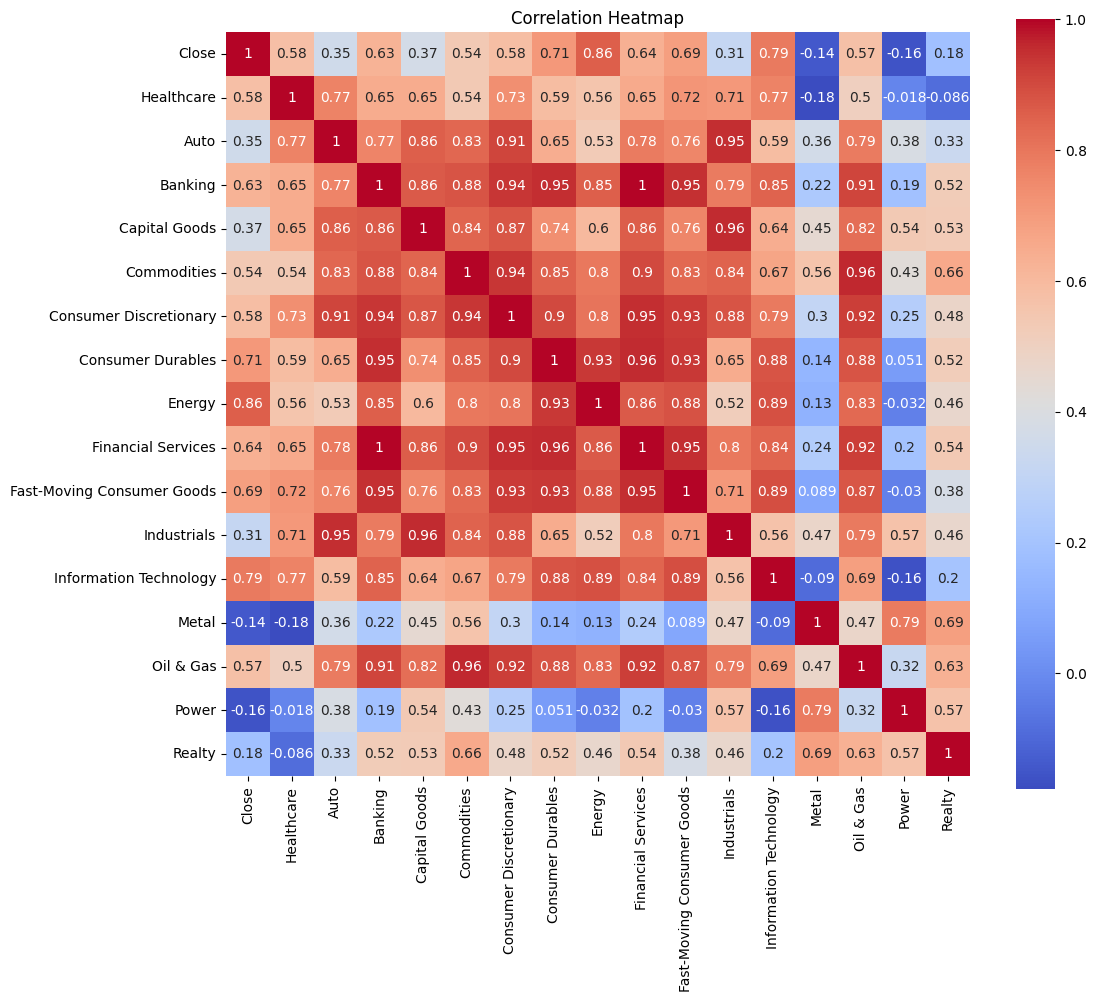

In [42]:
# heat map
plt.figure(figsize=(12, 10))
sns.heatmap(reliance_sectors[list(reliance_sectors.columns[1:18])].corr(), annot=True, square=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

There is a strong correlation between Reliance Industries stock prices and certain sectors of the Indian market. 

### Single Variable Linear Regression

In [43]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression as lr
from sklearn.preprocessing import PolynomialFeatures as pf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

In [44]:
# split data into training and testing sets
X = reliance_sectors['Energy'] # most correlated sector
y = reliance_sectors['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
# reshape datasets
X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)
y_train = y_train.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

In [46]:
# train and then test the model
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
predictions_lr = model_lr.predict(X_test)

In [47]:
print('Slope: ', model_lr.coef_)
print('Intercept: ', model_lr.intercept_)

mse_lr = mean_squared_error(y_test, predictions_lr)
print('MSE: ', mse_lr)
R2 = 1 - np.mean((predictions_lr - y_test)**2)/np.var(y_test)
print('R2: ', R2)

Slope:  [[0.2365054]]
Intercept:  [296.6227268]
MSE:  23895.036407622807
R2:  0.7315900148452245


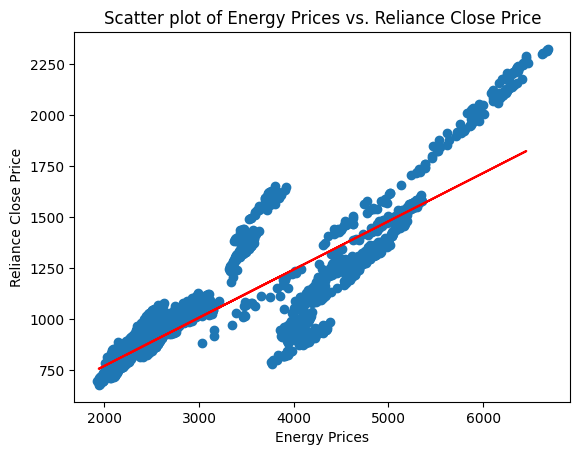

In [48]:
# Visualize the relationship
plt.scatter(reliance_sectors['Energy'], reliance_sectors['Close'])
plt.plot(X_test, predictions_lr, label=f'Simple Linear Regression (MSE={mse_lr:.2f})', color='red')
plt.xlabel('Energy Prices')
plt.ylabel('Reliance Close Price')
plt.title(f'Scatter plot of Energy Prices vs. Reliance Close Price')
plt.show()

In [49]:
# split data into training and testing sets
X = reliance_sectors['Information Technology'] # second most correlated sector
y = reliance_sectors['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
# reshape datasets
X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)
y_train = y_train.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

In [51]:
# train and then test the model
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
predictions_lr = model_lr.predict(X_test)

In [52]:
print('Slope: ', model_lr.coef_)
print('Intercept: ', model_lr.intercept_)

mse_lr = mean_squared_error(y_test, predictions_lr)
print('MSE: ', mse_lr)
R2 = 1 - np.mean((predictions_lr - y_test)**2)/np.var(y_test)
print('R2: ', R2)

Slope:  [[0.06761157]]
Intercept:  [339.83260149]
MSE:  33770.82872959359
R2:  0.6206564625663002


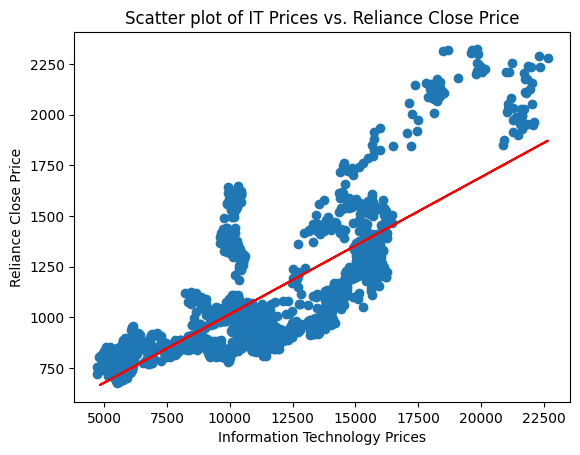

In [53]:
# Visualize the relationship
plt.scatter(reliance_sectors['Information Technology'], reliance_sectors['Close'])
plt.plot(X_test, predictions_lr, label=f'Simple Linear Regression (MSE={mse_lr:.2f})', color='red')
plt.xlabel('Information Technology Prices')
plt.ylabel('Reliance Close Price')
plt.title(f'Scatter plot of IT Prices vs. Reliance Close Price')
plt.show()

### Multivariable Linear Regression

In [54]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

                            Coefficients
Energy                          0.361793
Information Technology          0.035175
Consumer Durables              -0.037729
Fast-Moving Consumer Goods     -0.014287
Financial Services              0.106313
Banking                        -0.019452
Intercept:  114.28610604326786
MSE:  16245.677126059236
R^2:  0.81751432047018


Text(0.5, 1.0, 'Plot of prediction vs features in test set (multiple regression)')

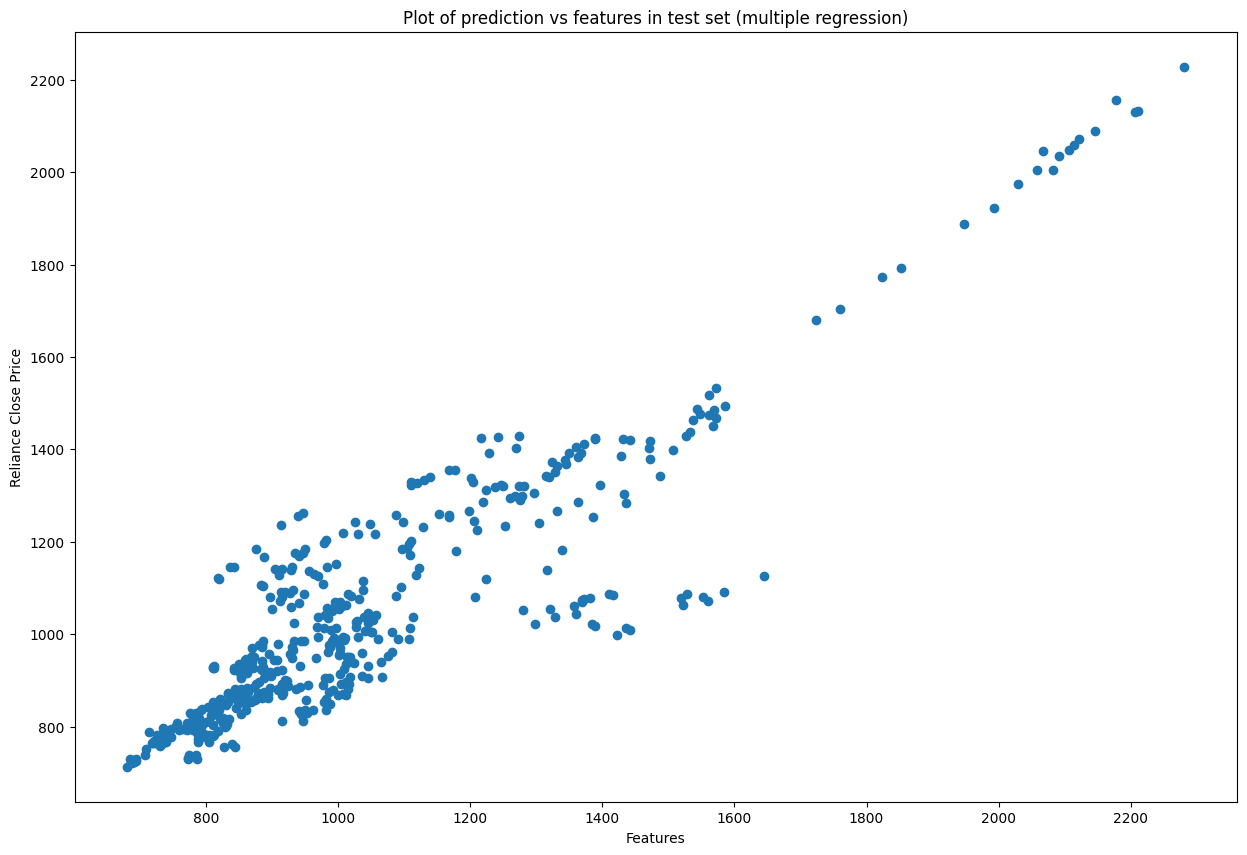

In [55]:
multi_X = reliance_sectors[most_correlated_sectors]
multi_y = reliance_sectors['Close']

X_train_mult, X_test_mult, y_train_mult, y_test_mult = train_test_split(multi_X, multi_y, test_size=0.2, random_state=42)

model_mult = LinearRegression()
model_mult.fit(X_train_mult, y_train_mult)
predictions = model_mult.predict(X_test_mult)

print(pd.DataFrame(model_mult.coef_,X_train_mult.columns,columns=['Coefficients']))
print('Intercept: ', model_mult.intercept_)

mse = mean_squared_error(y_test_mult, predictions)
print('MSE: ', mse)
print('R^2: ', 1 - np.mean((predictions - y_test_mult)**2)/np.var(y_test_mult))

plt.figure(figsize=(15,10))
plt.scatter(y_test, predictions) 
plt.xlabel('Features')
plt.ylabel('Reliance Close Price')
plt.title('Plot of prediction vs features in test set (multiple regression)')

A multivariable linear model regression better to predict Reliance's stock price because the MSE is lower than it was for the single-variable linear regressions of either Energy or IT. Also, the R^2 is higher than it was for single-variable linear regression.

### Lasso Regression

In [56]:
X = reliance_sectors.drop(['Date','Close'], axis=1)
y = reliance_sectors['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)
y_pred_train_lasso = lasso.predict(X_train)
y_pred_test_lasso = lasso.predict(X_test)

c:\Users\diyad\miniconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.951e+06, tolerance: 1.869e+04
  model = cd_fast.enet_coordinate_descent(


In [58]:
mse_train_lasso = mean_squared_error(y_train, y_pred_train_lasso)
mse_test_lasso = mean_squared_error(y_test, y_pred_test_lasso)
print(mse_train_lasso)

7426.202067468283


In [59]:
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': lasso.coef_})
nonzero_coefficients = coefficients[coefficients['Coefficient'] != 0]
print("Non-Zero Coefficients:")
print(nonzero_coefficients)

Non-Zero Coefficients:
                       Feature  Coefficient
0                   Healthcare    -0.011390
1                         Auto     0.010721
2                      Banking     0.014447
3                Capital Goods    -0.019309
4                  Commodities     0.330637
5       Consumer Discretionary     0.072165
6            Consumer Durables    -0.049022
7                       Energy     0.343592
8           Financial Services    -0.083344
9   Fast-Moving Consumer Goods     0.037214
10                 Industrials    -0.256407
11      Information Technology     0.026126
12                       Metal    -0.092834
13                   Oil & Gas     0.028730
14                       Power     1.205828
15                      Realty    -0.009395
16                     Telecom     0.021375
17                   Utilities    -0.831918


Using Lasso, we can see that certain sectors have an inverse relationship with Reliance stock price, which can also be useful when we are trying to predict Reliance's stock price.

In [212]:
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from gensim.models import Phrases
from gensim.corpora import Dictionary
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\diyad\AppData\Roaming\nltk_data...


True

In [213]:
fin_titles

0        ATMs to become virtual bank branches, accept d...
1        IDFC First Bank seniors to forgo 65% of bonus ...
2        Huge scam in YES Bank for many years, says Enf...
3        Bank of Maharashtra sanctioned Rs 2,789 cr in ...
4        DCB Bank's profit before tax declines 37.6% to...
                               ...                        
49995    Lic Mops Up Government Securities As Prices Crash
49996    Banks Plan To Raise Lending Rates Without Alte...
49997            Net Scheduled Inflows Of Rs 1,559.9 Crore
49998        Rbi Calls Meet To Push Floating Rate Deposits
49999                      Sticky Loans Divide Consortiums
Name: Title, Length: 50000, dtype: object

In [215]:
# Tokenize the documents.
from nltk.tokenize import RegexpTokenizer

# Split the documents into tokens.
tokenizer = RegexpTokenizer(r'\w+')
for idx in range(len(fin_titles)):
    fin_titles[idx] = fin_titles[idx].lower()  # Convert to lowercase.
    fin_titles[idx] = tokenizer.tokenize(fin_titles[idx])  # Split into words.

# Remove numbers, but not words that contain numbers.
fin_titles = [[token for token in fin_titles if not token.isnumeric()] for fin_titles in fin_titles]

# Remove short words.
fin_titles = [[token for token in fin_titles if len(token) > 3] for fin_titles in fin_titles]

# Remove words that are in STOPWORDS.
fin_titles = [[token for token in fin_titles if (token not in STOPWORDS)] for fin_titles in fin_titles]

In [216]:
fin_titles

[['atms',
  'virtual',
  'bank',
  'branches',
  'accept',
  'deposits',
  'instant',
  'credit'],
 ['idfc', 'bank', 'seniors', 'forgo', 'bonus', 'amid', 'covid', 'crisis'],
 ['huge', 'scam', 'bank', 'years', 'says', 'enforcement', 'directorate'],
 ['bank', 'maharashtra', 'sanctioned', 'loans', 'msmes', 'months'],
 ['bank', 'profit', 'declines', 'crore'],
 ['bank', 'baroda', 'advance', 'crore', 'msmes', 'govt', 'scheme'],
 ['retail',
  'msme',
  'loans',
  'cheaper',
  'cuts',
  'repo',
  'rate',
  'surprise',
  'action'],
 ['forecasts', 'economic', 'contraction', 'announces', 'sharp', 'rate'],
 ['extends', 'loan', 'moratorium', 'till', 'silent', 'time', 'restructuring'],
 ['govt', 'seeks', 'raise', 'second', 'tranche', 'bharat', 'bond'],
 ['covid',
  'crisis',
  'slippages',
  'jump',
  'trillion',
  'says',
  'india',
  'ratings'],
 ['lockdown',
  'normalcy',
  'returning',
  'shadow',
  'lenders',
  'albeit',
  'slow',
  'pace'],
 ['covid', 'banking', 'slippages', 'rise', 'fiscal', 

In [217]:
# Lemmatize the documents
lemmatizer = WordNetLemmatizer()
fin_titles = [[lemmatizer.lemmatize(token) for token in fin_titles] for fin_titles in fin_titles]

In [219]:
# Add bigrams and trigrams to docs (only ones that appear 20 times or more).
bigram = Phrases(fin_titles, min_count=20)
for idx in range(len(fin_titles)):
    for token in bigram[fin_titles[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            fin_titles[idx].append(token)

In [221]:
# Remove rare and scarce words
# Create a dictionary representation of the documents.
dictionary = Dictionary(fin_titles)

# Filter out words that occur in less than 20% of documents, or more than 50% of the documents
dictionary.filter_extremes(no_below=0.2, no_above=0.5)

In [222]:
# Bag of words
bow_corpus = [dictionary.doc2bow(fin_titles) for fin_titles in fin_titles]

In [223]:
from gensim.models import LdaModel
# Train LDA model, 3 topics modelling
lda_model = LdaModel(bow_corpus, num_topics=3, id2word=dictionary, passes=10)

In [224]:
# Display main words for each topic
topics = lda_model.print_topics(num_words=10)

# Print topics and main words
for topic in topics:
    print("Topic", topic[0], ":")
    main_words = topic[1].split("+")
    for word in main_words:
        print(word.split("*")[1].strip(), end=", ")
    print("\n")

Topic 0 :
"rate", "bank", "market", "rupee", "credit", "report", "deposit", "gilt", "hike", "bond", 

Topic 1 :
"bank", "plan", "icici", "crore", "loan", "raise", "life", "idbi", "hdfc", "profit", 

Topic 2 :
"bank", "fund", "firm", "insurance", "norm", "banking", "seek", "card", "insurer", "finance", 



Each of these topics is related to banking/finance. Based on our regressions, we can make sense of this because the Lasso regression has a near-zero coefficient for both banking and financial services. This means that they will not play a significant role in predicting the stock price of Reliance Industries.